https://ibiblio.org/e-notes/Perc/xy.htm#:~:text=Eij%20%3D%20


In [1]:
import xygame as xg
import time as tm
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [2]:
start_time = tm.time()

rows = 20
cols = 20
beta = 1.1199
J = 1


In [3]:
time = 30
lattice = xg.field_generator(rows,cols)
b_field = xg.field_generator(rows,cols, left_most=0, right_most=0)
model = xg.full_model(lattice=lattice, B_field=b_field, beta=beta, time=time, J=J)

In [4]:
images = [lattice.copy()]
total_energy_list = [xg.get_net_energy(model)]
total_spin_list = [xg.get_net_spin(model)]
avg_energy_list = [xg.get_avg_energy(model)]
avg_M_list = [xg.get_avg_M(model)]
corr_func_list = []
L_t_list = []

time_steps = []

In [5]:
time = 30
for i in range(time):
    xg.metropolis(model)
    if (time % 10 == 0):
        images.append(model.lattice.copy())
        total_energy_list.append(xg.get_net_energy(model))
        total_spin_list.append(xg.get_net_spin(model))
        avg_energy_list.append(xg.get_avg_energy(model))
        avg_M_list.append(xg.get_avg_M(model))    
        corr_func = xg.compute_correlation_function(model)
        corr_func_list.append(corr_func)
        L_t = xg.find_characteristic_length(corr_func)
        time_steps.append(i)
        L_t_list.append(L_t)

print(f"Step {time}, Correlation Function: {corr_func}")
print(f'Characteristic length scale: {L_t}')

Step 30, Correlation Function: [[ 1.00000000e+00  4.84180742e-02  1.78246632e-02  2.35453870e-02
   3.94820644e-02  5.39686648e-02  7.80305251e-03  4.55150862e-02
  -3.52499516e-02  7.41331548e-02 -2.79008941e-02  7.41331548e-02
  -3.52499516e-02  4.55150862e-02  7.80305251e-03  5.39686648e-02
   3.94820644e-02  2.35453870e-02  1.78246632e-02  4.84180742e-02]
 [ 1.02374149e-02 -5.96199555e-02 -2.32644275e-02 -3.49822053e-02
   6.24977342e-03 -1.09871172e-02  5.72756558e-03  2.29065368e-02
   3.14967526e-04  4.23604279e-02 -7.46479005e-02  8.59764604e-02
  -2.90845473e-02 -1.61046538e-02 -2.65410982e-02 -3.23641471e-02
   1.98297287e-02 -1.19651060e-02  3.21713016e-02 -3.89377537e-03]
 [-6.76563150e-04 -3.22437662e-02 -5.23040340e-02  8.01684999e-03
  -4.07305399e-02  4.58502618e-03  2.59737678e-02  6.98903245e-02
   1.20284082e-02  1.96148817e-02 -2.55364611e-02 -2.96018544e-02
  -3.16387026e-02 -9.33020286e-03 -3.30058041e-02  2.29265978e-02
   1.84633993e-02 -1.62016884e-02 -1.287498

In [6]:
xg.display_xy_sequence(images)

interactive(children=(IntSlider(value=15, description='frame', max=30), Output()), _dom_classes=('widget-inter…

<function xygame.display_xy_sequence.<locals>._show(frame=(0, 30))>

In [7]:
xg.display_correlation_func_sequence(corr_func_list)

interactive(children=(IntSlider(value=14, description='frame', max=29), Output()), _dom_classes=('widget-inter…

<function xygame.display_correlation_func_sequence.<locals>._show(frame)>

/workspaces/Vinalslab/xy_model/xygame.py:448: RuntimeWarning: divide by zero encountered in power
  return a * t**b


Growth exponent b: 3.2371767859575374e-05


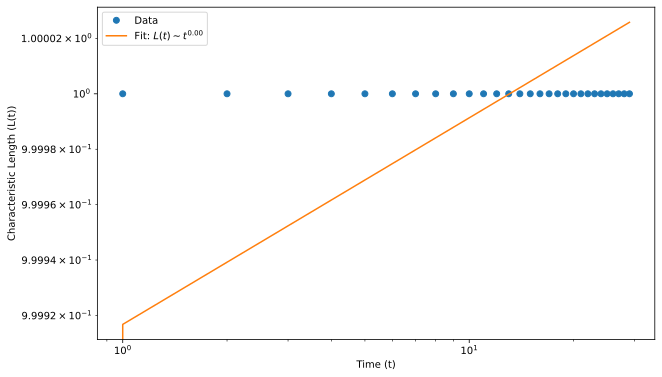

In [8]:
time_steps = np.array(time_steps)
L_t_list = np.array(L_t_list)

# Fit the characteristic length data to the power law
popt, pcov = curve_fit(xg.power_law, time_steps, L_t_list)
b, a = popt
print(f"Growth exponent b: {b}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.loglog(time_steps, L_t_list, 'o', label='Data')
plt.loglog(time_steps, xg.power_law(time_steps, *popt), '-', label=f'Fit: $L(t) \sim t^{{{b:.2f}}}$')
plt.xlabel('Time (t)')
plt.ylabel('Characteristic Length (L(t))')
plt.legend()
plt.show()

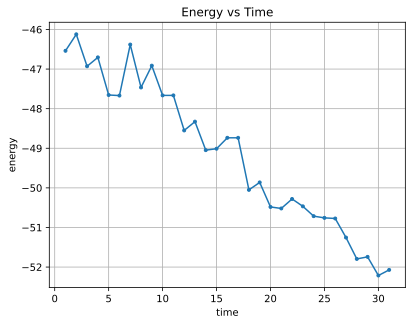

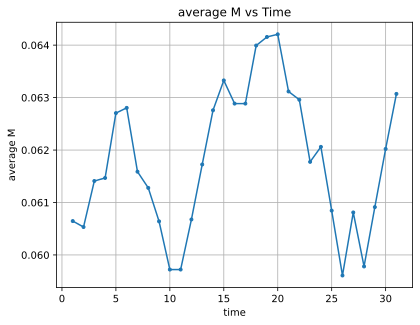

In [9]:
xg.graph_list(total_energy_list, "time", "energy", "Energy vs Time")
xg.graph_list(avg_M_list, "time", "average M", "average M vs Time")

In [10]:
# xg.display_xy_sequence_html(images, folder_file_name = "my_frame/animation.html")
# xg.export_mp4(image_folder_name = "my_frame/animation_frames", output_file_name="my_animation", frame_rate=48)

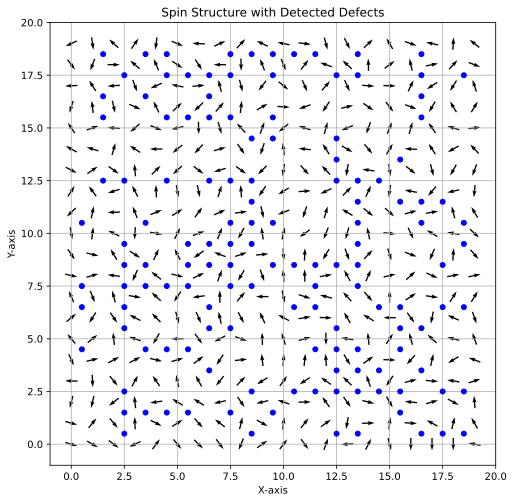

In [11]:
# first way
defects = xg.detect_defects(lattice)

# second way
defects_part_2 = xg.detect_defects_part_2(lattice)

# Plot the spin structure and the detected defects
X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
U = np.cos(lattice)
V = np.sin(lattice)

plt.figure(figsize=(8, 8))
plt.quiver(X, Y, U, V, pivot='mid')
for (x, y) in defects:
    plt.plot(x, y, 'ro' if x % 2 == 0 else 'bo', markersize=5)  # red for vortices, blue for antivortices with small marker
for (x, y) in defects_part_2:
    plt.plot(x, y, 'ko' if x % 2 == 0 else 'go', markersize=1)  # red for vortices, blue for antivortices with small marker
plt.xlim(-1, cols)
plt.ylim(-1, rows)
plt.title('Spin Structure with Detected Defects')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

In [12]:
end_time = tm.time()
total_time = end_time - start_time
print(f"Total time taken to run the notebook: {total_time} seconds")


Total time taken to run the notebook: 12.871487855911255 seconds
